In [8]:
pip install -U sentence-transformers

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 2.3MB 9.1MB/s 
     |████████████████████████████████| 1.2MB 32.6MB/s 
     |████████████████████████████████| 901kB 34.5MB/s 
     |████████████████████████████████| 3.3MB 36.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.1-cp37-none-any.whl size=123338 sha256=42a8400e9bae35d64ea29f5299ecc5da054b18d0220ec852993596651f1dbdd7
  Stored in directory: /root/.cache/pip/wheels/5e/89/29/45e45adc162b50f97f71801e8b07947c9cfe2b3ae7dbf37896
Successfully built sentence-transformers


In [7]:
import pandas as pd
import seaborn as sns
import re
import string
from string import punctuation
import nltk
import spacy
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('punkt')
nltk.download("stopwords")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping



from nltk import tokenize
from operator import itemgetter
import math
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

!pip install rake-nltk
from rake_nltk import Rake

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=8d38bfca5be90e1f800a16d083d4b561c98790283325349bb6960e8f68ae9a5a
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/drugsComTest_raw.csv")

In [ ]:
df=pd.DataFrame(data=(data["drugName"],data["review"]))
df=df.T
for i in df.index:
  df['review'][i]=df['review'][i].replace("&#039;","'")
  df['review'][i]=df['review'][i].replace(",","")
  df['review'][i]=df['review'][i].replace("\\","")
  df['review'][i]=df['review'][i].replace("\"","")
  df['review'][i]=df['review'][i].replace("\"]","")
  df['review'][i]=df['review'][i].replace("[\"","")
  df['review'][i]=df['review'][i].replace("!",".")
  df['review'][i]=df['review'][i].replace("?",".")
df

In [ ]:
df2 = df.groupby("drugName")
df_new = df2["review"].apply(list)
df_new = df_new.reset_index()
df_new

In [ ]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [ ]:
df_new['rev'] = df_new['review'].apply(get_text_processing)
df_new.head()

,drugName,review,rev
0,A / B Otic,[These drops helped me so much. I was in sever...,drops helped much. severe pain 8 days finally ...
1,Abacavir / dolutegravir / lamivudine,[I discovered my new status in July 2017 VL 94...,discovered new status July 2017 VL 94K CD4 126...
2,Abacavir / lamivudine,[I've used this since first diagnosed and star...,I've used since first diagnosed starting HAART...
3,Abatacept,[In UK had this on NHS for last 7 months. Impr...,UK NHS last 7 months. Improved within first mo...
4,Abilify,[After having to pay a but load out of pocket ...,pay load pocket slowly found me. put hyper-man...


In [ ]:
def Summarizer(test):
  df_new["review"][test]
  sentence = sent_tokenize(str(df_new["review"][test]))
  temp=df_new["rev"][test].split(".")
  all_words = [i for i in temp]
  #model = Word2Vec([all_words], min_count=1,size= 300)
  sent_vector=[]
  temp=df_new["rev"][test].split(".")
  for i in temp:
      plus=0
      for j in i.split("."):
          #plus+=model.wv[j]
          plus+= embedder.encode(j)
      plus = plus/len(i.split("."))
      sent_vector.append(plus)
  n_clusters = 1
  kmeans = KMeans(n_clusters, init = 'k-means++', random_state = 42)
  y_kmeans = kmeans.fit_predict(sent_vector)
  my_list=[]
  for i in range(n_clusters):
      my_dict={}
    
      for j in range(len(y_kmeans)):
        
          if y_kmeans[j]==i:
              my_dict[j] =  distance.euclidean(kmeans.cluster_centers_[i],sent_vector[j])
      min_distance = min(my_dict.values())
      my_list.append(min(my_dict, key=my_dict.get))
 
  print(my_list)                          
  for i in sorted(my_list):
      print(sentence[i])

In [ ]:
test=13
df_new["review"][test]
Summarizer(test)

[4]
', "I was breaking out badly on the sides of my cheeks then I couldn't take it anymore so I went to the dermo and they prescribed me Acanya.


In [ ]:
print(str(df_new["review"][test]))
test=0

['Honestly this medicine has been life changing for me. Before I used it my acne was awful mostly on my forehead but all around the rest of my face too. My dermatologist prescribed it to me and within a month of using it my acne completely cleared up. Now three years later I still use it and my face remains acne free.', "I was breaking out badly on the sides of my cheeks then I couldn't take it anymore so I went to the dermo and they prescribed me Acanya. After 2 weeks I noticed a difference for sure. The big cysts I would get or just all these pimples I got in 1 spot started fading away instantly. It is take time I had to pop some and then put the cream on. It's been 3 months so far and no breakouts or acne whatsoever. I just use cetaphil and that medication and done. (:", "I LOVE this product. I suffered from breakouts (not horrible) but enough to make me self-conscious about. It does not make your face dry if anything it smooths it out. I use a tad in the morning and a whole pump at

In [ ]:
df_new["review"][test]

In [ ]:
X=[]
y=[]
for test in range(0,len(df_new)):
  try:
    stri=''
    for sen in df_new["review"][test]:
      stri=stri+sen
    stri=stri.split(".")
    stri.pop()
    sentence = sent_tokenize(str(df_new["review"][test]))
    temp=df_new["rev"][test].split(".")
    temp.pop()
    length=len(temp)
    if (length == 1):
      temp[0]+="."
    all_words = [i for i in temp]
    #model = Word2Vec([all_words], min_count=1,size= 300)
    sent_vector=[]
    for i in temp:
        plus=0
        for j in i.split("."):
            #plus+=model.wv[j]
            plus+= embedder.encode(j)
        plus = plus/len(i.split("."))
        sent_vector.append(plus)
    n_clusters = (int)(length/5)+1
    kmeans = KMeans(n_clusters, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(sent_vector)
    my_list=[]
    for i in range(n_clusters):
        my_dict={}
      
        for j in range(len(y_kmeans)):
          
            if y_kmeans[j]==i:
                my_dict[j] =  distance.euclidean(kmeans.cluster_centers_[i],sent_vector[j])
        min_distance = min(my_dict.values())
        my_list.append(min(my_dict, key=my_dict.get))
    temp=""
    for i in stri:
      temp+=i
    X.append(temp)
    temp="start "                        
    for i in sorted(my_list):
        if (i>=0):
          temp+=stri[i]
    temp+=" end"
    y.append(temp)
  except:
    pass

0
1
2
3
4


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x7fdd3348ad50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/notebook.py", line 220, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


5
6
7
8
9


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x7fdd33821dd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/notebook.py", line 220, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
28

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910


In [ ]:
dict = {'Text': X, 'Summary': y}    
df = pd.DataFrame(dict)
df.to_csv('/content/drive/MyDrive/Testtrainsummary.csv')

In [10]:
dat=pd.read_csv("/content/drive/MyDrive/Testtrainsummary.csv")

In [11]:
X=dat["Text"]
y=dat["Summary"]

In [21]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from attention import AttentionLayer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

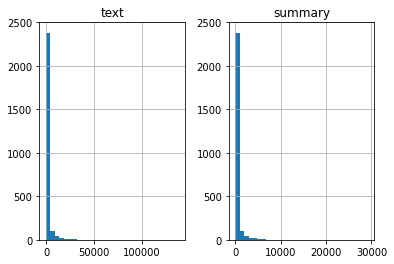

In [22]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in X:
      text_word_count.append(len(i.split()))

for i in y:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [23]:
max_len_text=600 
max_len_summary=150

In [24]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(X,y,test_size=0.1,random_state=0,shuffle=True) 

In [25]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [26]:

#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [28]:

from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.5) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 
#layer1 = tf.keras.layers.Dropout(0.5)
#dropout_output1, state_h2, state_c2 = layer2(encoder_output2)

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.5) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
#layer2 = tf.keras.layers.Dropout(0.5)
#dropout_output2, state_h2, state_c2 = layer2(encoder_output2) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.5) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 
#layer = tf.keras.layers.Dropout(0.5)

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 600)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 600, 500)     29193500    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 600, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [55]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/MyDrive/model_training.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss',
                             verbose=1, save_best_only=True,
                             mode='min')

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=12,callbacks = [checkpoint],batch_size=32, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/12
73/73 [==============================] - 219s 3s/step - loss: 5.4075 - accuracy: 0.4532 - val_loss: 3.6533 - val_accuracy: 0.4764

Epoch 00001: loss improved from inf to 4.24978, saving model to /content/drive/MyDrive/model_training.hdf5
Epoch 2/12
73/73 [==============================] - 211s 3s/step - loss: 3.4013 - accuracy: 0.5128 - val_loss: 3.6109 - val_accuracy: 0.4785

Epoch 00002: loss improved from 4.24978 to 3.41569, saving model to /content/drive/MyDrive/model_training.hdf5
Epoch 3/12
73/73 [==============================] - 211s 3s/step - loss: 3.2469 - accuracy: 0.5263 - val_loss: 3.4858 - val_accuracy: 0.4853

Epoch 00003: loss improved from 3.41569 to 3.31232, saving model to /content/drive/MyDrive/model_training.hdf5
Epoch 4/12
73/73 [==============================] - 210s 3s/step - loss: 3.1422 - accuracy: 0.5314 - val_loss: 3.3906 - val_accuracy: 0.4967

Epoch 00004: loss improved from 3.31232 to 3.18572, saving model to /content/drive/MyDrive/model_traini

In [33]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/model_training.hdf5', custom_objects={'AttentionLayer': AttentionLayer})

In [1]:
model.save("/content/drive/MyDrive/fmodel1.hdf5")

NameError: ignored

In [34]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

NameError: ignored

In [35]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [36]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [37]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token'
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if (sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [38]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [39]:
for i in range(0,10):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Review: needed to use the remaining suppositories due to itching and minor bleeding from hard stool noticed blood sugar rising about 40 pts now that i stopped using it condition somewhat better and sugars are lower 
Original summary: needed to use the remaining suppositories due to itching and minor bleeding from hard stool 
 logthis logthis logthis logthis way logthis logthis logthis way


Review: this is my second go around with this medicine my sugars stay in the 200's it makes me eat all the is an excellent addition to my regimen in controlling my i have experienced weight loss and it is very affordable my doctor gave me a value card which fixes the co pay at just 10 per month at last a new medicine that works and is affordablei am a type 2 diabetic for 13 years insulins lantus and novolog flex pen actos metformin sugar was still high a1c 119 i know it says not to be used with insulin but doctor said it would benefit me to lower my levels adding this dropped my a1c level to 65 big 

Review: exceptionally good product to relieve mild dermatitis symptoms it has come in 2 part a large bottle of liquid and a capsule of the active ingredient if you are not going to use the product immediately tell the pharmacist to not mix the products for you the solution is good only for 3 months from the date of on holiday in hot sunny climates i always suffer from severe heat rash after using synalar cream it clears after a day or so it is brilliant 




Original summary: when on holiday in hot sunny climates i always suffer from severe heat rash after using cream it clears after a day or so it is brilliant 




Predicted summary:  i have yellow problems with less side effects than the way of them it was the most effective medication i've tried the top of the skin it has less dry and less than when i was able to get rid of the pills of the 250 mg advair i give it a 10 out of it for about ten days i had an allergic reaction to the medicine i had the nausea some way it subsided the first two days about 3 days later and my skin has improved and my cancer was approved by the way as the medicine lasts a good pills at least but as the results it has gotten so much better than some of the nausea or not the relief i had some noticeable side effects that i had some relief from the first two weeks in the past

## **Installing and Importing necessary libraries**

In [ ]:
!pip install -U sentence-transformers
!pip install rake-nltk

In [ ]:
import pandas as pd
import seaborn as sns
import re
import string
from string import punctuation
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from nltk import tokenize
from operator import itemgetter
import math
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
from rake_nltk import Rake
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Reading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/drugsComTest_raw.csv")

## **Pre-processing the data**

### **Removing symbols**

In [ ]:
df=pd.DataFrame(data=(data["drugName"],data["review"]))
df=df.T
for i in df.index:
  df['review'][i]=df['review'][i].replace("&#039;","'")
  df['review'][i]=df['review'][i].replace(",","")
  df['review'][i]=df['review'][i].replace("\\","")
  df['review'][i]=df['review'][i].replace("\"","")
  df['review'][i]=df['review'][i].replace("\"]","")
  df['review'][i]=df['review'][i].replace("[\"","")
  df['review'][i]=df['review'][i].replace("!",".")
  df['review'][i]=df['review'][i].replace("?",".")
df

,drugName,review
0,Mirtazapine,I've tried a few antidepressants over the year...
1,Mesalamine,My son has Crohn's disease and has done very w...
2,Bactrim,Quick reduction of symptoms
3,Contrave,Contrave combines drugs that were used for alc...
4,Cyclafem 1 / 35,I have been on this birth control for one cycl...
...,...,...
53761,Tamoxifen,I have taken Tamoxifen for 5 years. Side effec...
53762,Escitalopram,I've been taking Lexapro (escitaploprgram) sin...
53763,Levonorgestrel,I'm married 34 years old and I have no kids. T...
53764,Tapentadol,I was prescribed Nucynta for severe neck/shoul...


### **Grouping the data by medicine names**

In [ ]:
df2 = df.groupby("drugName")
df_new = df2["review"].apply(list)
df_new = df_new.reset_index()
df_new

,drugName,review
0,A / B Otic,[These drops helped me so much. I was in sever...
1,Abacavir / dolutegravir / lamivudine,[I discovered my new status in July 2017 VL 94...
2,Abacavir / lamivudine,[I've used this since first diagnosed and star...
3,Abatacept,[In UK had this on NHS for last 7 months. Impr...
4,Abilify,[After having to pay a but load out of pocket ...
...,...,...
2632,ZzzQuil,[Gave me rapid heart beats .........]
2633,depo-subQ provera 104,[Just recently have got Depo subQ provera for ...
2634,ella,[Hello strangers. Im here to share my experien...
2635,femhrt,[Hot flashes completely gone in less than 2 we...


### **Stopword Removal**

In [ ]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

### **Creating a separate column for the refined text**

In [ ]:
df_new['rev'] = df_new['review'].apply(get_text_processing)
df_new.head()

,drugName,review,rev
0,A / B Otic,[These drops helped me so much. I was in sever...,drops helped much. severe pain 8 days finally ...
1,Abacavir / dolutegravir / lamivudine,[I discovered my new status in July 2017 VL 94...,discovered new status July 2017 VL 94K CD4 126...
2,Abacavir / lamivudine,[I've used this since first diagnosed and star...,I've used since first diagnosed starting HAART...
3,Abatacept,[In UK had this on NHS for last 7 months. Impr...,UK NHS last 7 months. Improved within first mo...
4,Abilify,[After having to pay a but load out of pocket ...,pay load pocket slowly found me. put hyper-man...


## **Feature Extraction**

### **Extracting keywords using BERT and RAKE**

In [ ]:
bertmodel = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [ ]:
def key(text):
  r = Rake()
  temp=text.split(' ')
  a=[]
  r.extract_keywords_from_sentences(temp)
  # To get keyword phrases ranked highest to lowest.
  r.get_ranked_phrases()
  rakew=[]
  # To get keyword phrases ranked highest to lowest with scores.
  a=r.get_ranked_phrases()
  t = 20
  if(len(a)<20):
    t = len(a)
  for i in range(0,t):
    rakew.append(a[i])
  
  temp=text.split(".")
  all_words = [i for i in temp]
  sent_vector=[]
  temp=text.split(".")
  t=''
  for i in temp:
    t+=i

  n_gram_range = (1, 1)
  stop_words = "english"

  # Extract candidate words/phrases
  count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([t])
  candidates = count.get_feature_names()

  doc_embedding = bertmodel.encode([t])
  candidate_embeddings = bertmodel.encode(candidates)

  top_n = 15
  distances = cosine_similarity(doc_embedding, candidate_embeddings)
  keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

  f_keywords = list(keywords+rakew)

  return f_keywords

### **Calculating TF-IDF values for the keywords**

In [ ]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result.keys()
    
def caltfidf(total_words,text):
  total_word_length = len(total_words)
  total_sentences = tokenize.sent_tokenize(text)
  total_sent_len = len(total_sentences)

  tf_score = {}
  for each_word in total_words:
      each_word = each_word.replace('.','')
      if each_word not in stop_words:
          if each_word in tf_score:
              tf_score[each_word] += 1
          else:
              tf_score[each_word] = 1

  # Dividing by total_word_length for each dictionary element
  tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

  idf_score = {}
  for each_word in total_words:
      each_word = each_word.replace('.','')
      if each_word not in stop_words:
          if each_word in idf_score:
              idf_score[each_word] = check_sent(each_word, total_sentences)
          else:
              idf_score[each_word] = 1

  # Performing a log and divide
  idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())


  tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

  t = 25
  if(len(tf_idf_score)<25):
    t = len(tf_idf_score)

  tfidfw=list(get_top_n(tf_idf_score, t))
  return tfidfw

### **POS Tagging the resultant keywords**

In [ ]:
def features(text):
  f_keywords = key(text)
  tfidfw = caltfidf(f_keywords,text)
  tfidfw = " ".join(tfidfw)

  stop_words = set(stopwords.words('english'))

  tokenized = sent_tokenize(tfidfw)

  for i in tokenized:
    wordsList = nltk.word_tokenize(i)

    wordsList = [w for w in wordsList if not w in stop_words]

    tagged = nltk.pos_tag(wordsList)


  
  for i in range(0,len(tagged)):
    if(tagged[i][1]=='JJ' or tagged[i][1]=='NN' or tagged[i][1]=='VBP' or tagged[i][1]=='VBG'):
      print(tagged[i][0])

### **Removing Stopwords from the given text**

In [ ]:
def findFeatures(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    finalText = ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

    features(finalText)

### **Feature Extraction for the reviews from the dataset**

In [ ]:
test = 7
text = ' '.join([line for line in df_new['review'][test]])
findFeatures(text)

### **Feature Extraction for user input text**

In [ ]:
text = "The surface level is the actual realization of words as they appear in the final form. The lexical level corresponds to the combination of roots and affixes that are chained together with boundary markers."
findFeatures(text)